In [615]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [616]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')

In [617]:
# train data 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [618]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [619]:
# train data에 결측치가 보임. 전처리를 어떻게 할지 정하기 위해 기술통계 진행

In [620]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. PassengerId: 승객은 891명
2. Survived: 약 38%가 Survived
3. Pclass: 1, 2, 3등급이 있다
4. Age: 전체 평균은 약 30세, 최소 0.42세가 있고 최대 80세이며, 승객의 50%는 20세~ 38세 사이이다
5. SibSp: 전체의 약 50% 이상은 형제, 자매와 함께 타지 않았다. 가장 많이 함께 탄 사람은 8명과 함께.
6. Parch: 전체의 약 75% 이상은 부모, 자녀와 함께 타지 않았다. 가장 많이 함께 탄 사람은 6명과 함께.
7. Fare: 운임은 평균 약 32달러, 최소 0달러, 최대 약 512달러이며, 승객의 75%는 31달러 이하를 지불했다.

## Survived

In [621]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

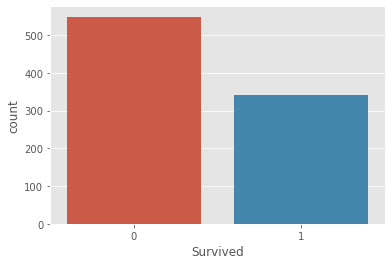

In [622]:
sns.countplot(data = df_train, x = 'Survived')
plt.show()

- Survived 342명(약 38%), 반대는 549명(약 62%)

## Pclass와 Survived

In [623]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

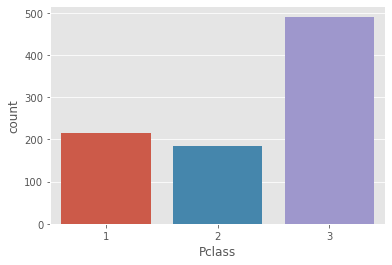

In [624]:
sns.countplot(data = df_train, x = 'Pclass')
plt.show()

In [625]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- 탑승객 수는 3, 1, 2순으로 많으며
- Survived 비율은 1, 2, 3순으로 많다

## Sex와 Survived

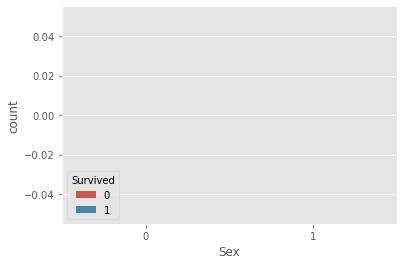

In [626]:
sns.countplot(data = df_train, x = 'Sex', order = [0, 1], hue = 'Survived')
plt.show()

In [627]:
round(df_train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean(), 2)

,Sex,Survived
0,female,0.74
1,male,0.19


- 여성 약 74%, 남성 약 19% 생존

## Pclass, Sex와 Survived

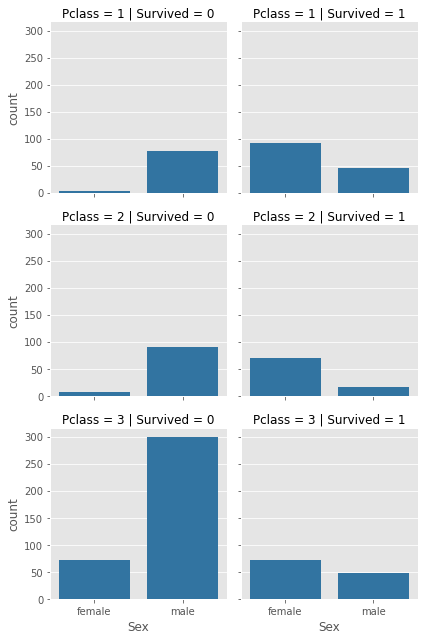

In [628]:
g = sns.FacetGrid(df_train, col = 'Survived', row = 'Pclass')
g.map(sns.countplot, 'Sex', order = ['female', 'male'], color = 'tab:blue')
plt.show()

In [629]:
round(df_train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index = False).mean(), 2)

,Pclass,Sex,Survived
0,1,female,0.97
1,1,male,0.37
2,2,female,0.92
3,2,male,0.16
4,3,female,0.50
5,3,male,0.14


- 성별 상관없이 1, 2, 3등급 순으로 생존율이 높다
- 남성은 여성에 비해 생존율이 평균 3배 이상 낮다

## Age와 Survived

In [630]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

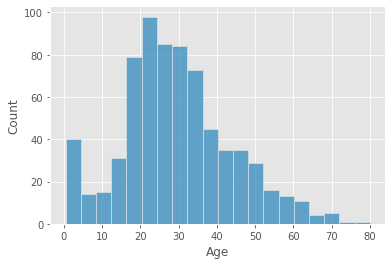

In [631]:
sns.histplot(data = df_train['Age'])
plt.show()

- 영/유아의 비율이 의외로 높음
- 연령대 정리 필요함: ~ 10, ~20, ~30, ~40, ~50, 50 ~

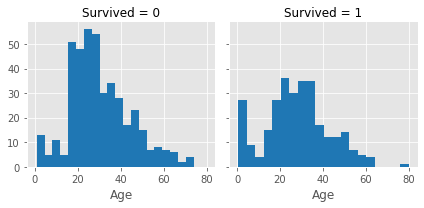

In [632]:
g = sns.FacetGrid(df_train, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20, color = 'tab:blue')
plt.show()

- 유아 생존율이 높은 편
- 20대 생존율이 낮은 편

## Pclass, Age, Survived

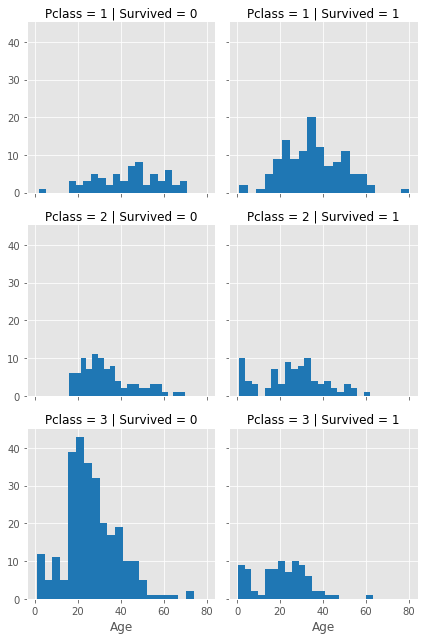

In [633]:
g = sns.FacetGrid(df_train, col = 'Survived', row = 'Pclass')
g.map(plt.hist, 'Age', bins = 20, color = 'tab:blue')
plt.show()

- 0세~10세 이하 영유아 생존율이 높다.
- 1등급 탑승한 20~40세의 생존율이 높다
- 3등급 탑승한 10대~40대 생존율이 낮다

## Sibsp와 Survived

In [634]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [635]:
round(df_train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean(), 2)

,SibSp,Survived
0,0,0.35
1,1,0.54
2,2,0.46
3,3,0.25
4,4,0.17
5,5,0.00
6,8,0.00


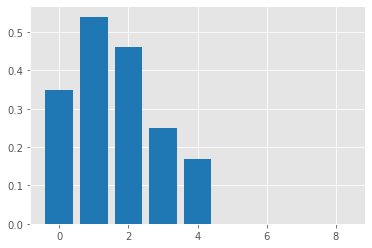

In [636]:
plt.bar(data = round(df_train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean(), 2), x = 'SibSp', height = 'Survived', color = 'tab:blue')
plt.show()

- 동반한 배우자와 형제자매가 1명인 사람들이 가장 많이 생존
- 동반한 배우자와 형제자매가 5명 이상인 사람들은 생존율 0%

## Parch와 Survived

In [637]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [638]:
round(df_train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean(), 2)

,Parch,Survived
0,0,0.34
1,1,0.55
2,2,0.50
3,3,0.60
4,4,0.00
5,5,0.20
6,6,0.00


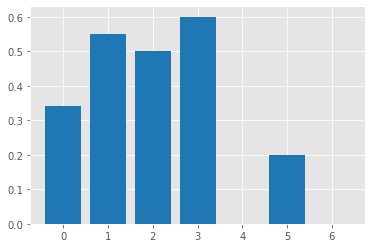

In [639]:
plt.bar(data = round(df_train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean(), 2), x = 'Parch', height = 'Survived', color = 'tab:blue')
plt.show()

- 동반한 부모 또는 자녀가 3명인 사람들 생존율이 가장 높음
- 동반한 부모 또는 자녀가 4명, 6명인 사람들은 생존율 0%

## Fare와 Survived

In [640]:
round(df_train[['Fare', 'Survived']].groupby('Survived', as_index = False).mean(), 2)

,Survived,Fare
0,0,22.12
1,1,48.40


- 생존한 사람들의 Fare가 그렇지 않은 사람들보다 2배 이상 높다

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


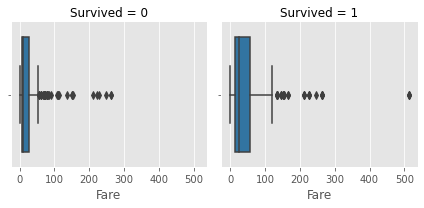

In [641]:
g = sns.FacetGrid(df_train, col = 'Survived')
g.map(sns.boxplot, 'Fare', color = 'tab:blue')
plt.show()

In [642]:
round(df_train[['Pclass', 'Fare']].groupby('Pclass', as_index = False).mean(), 2)

,Pclass,Fare
0,1,84.15
1,2,20.66
2,3,13.68


## Embarked와 Survived

In [643]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [644]:
round(df_train[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean(), 2)

,Embarked,Survived
0,C,0.55
1,Q,0.39
2,S,0.34


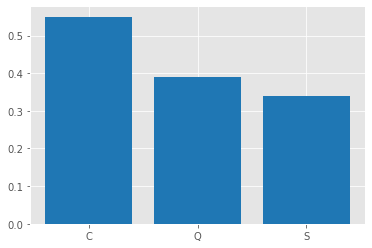

In [645]:
plt.bar(data = round(df_train[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean(), 2), x = 'Embarked', height = 'Survived', color = 'tab:blue')
plt.show()

>C = Cherbourg / 
Q = Queenstown / 
S = Southampton
- Southampton, Cherbourg, Queenstown 순으로 많이 탑승했다.
- 승선한 항구에 따라 생존율이 다르다.
    - Cherbourg의 승객들이 가장 생존율이 높고, 그 다음으로 Queenstown, Southampton이다.

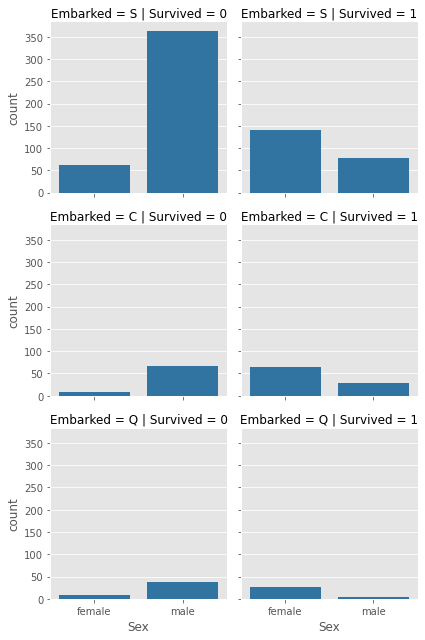

In [646]:
g = sns.FacetGrid(df_train, col = 'Survived', row = 'Embarked')
g.map(sns.countplot, 'Sex', order = ['female', 'male'], color = 'tab:blue')
plt.show()

- Queenstown에서 탑승한 남성의 생존율이 가장 낮다
- Cherbourg에서 탑승한 여성의 생존율이 가장 높다
- 남성은 Fare, Pclass, 생존율이 정비례한다
- 여성은 Fare, Pclass가 정비례하지만, 생존율은 상관관계가 보이지 않는다.

## Survived와 다른 요인들의 관계

In [647]:
round(df_train[['Embarked', 'Sex', 'Survived', 'Fare', 'Pclass', 'SibSp', 'Parch']].groupby(['Embarked', 'Sex'], as_index = False).mean(), 2)

,Embarked,Sex,Survived,Fare,Pclass,SibSp,Parch
0,C,female,0.88,75.17,1.73,0.55,0.49
1,C,male,0.31,48.26,2.01,0.26,0.26
2,Q,female,0.75,12.63,2.89,0.22,0.22
3,Q,male,0.07,13.84,2.93,0.61,0.12
4,S,female,0.69,38.74,2.20,0.84,0.79
5,S,male,0.17,21.71,2.42,0.45,0.24


- Cherbourg, Southampton, Queenstown 순으로 평균 Fare가 비싸다
- Cherbourg 승선객들은 평균 지불 금액 및 생존율이 가장 높다

In [648]:
round(df_train[['Embarked', 'Sex', 'Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].groupby(['Embarked', 'Sex', 'Pclass'], as_index = False).mean(), 2)

,Embarked,Sex,Pclass,Survived,Age,Fare,SibSp,Parch
0,C,female,1,0.98,36.05,115.64,0.51,0.30
1,C,female,2,1.00,19.14,25.27,0.71,0.57
2,C,female,3,0.65,14.06,14.69,0.57,0.83
3,C,male,1,0.40,40.11,93.54,0.24,0.33
4,C,male,2,0.20,25.94,25.42,0.50,0.50
5,C,male,3,0.23,25.02,9.35,0.23,0.14
6,Q,female,1,1.00,33.00,90.00,1.00,0.00
7,Q,female,2,1.00,30.00,12.35,0.00,0.00
8,Q,female,3,0.73,22.85,10.31,0.21,0.24
9,Q,male,1,0.00,44.00,90.00,2.00,0.00


- 전원 생존: Cherbourg탑승 여성 2등급, Queenstown탑승 여성 1등급 및 2등급
- 75% 이상 생존: Cherbourg탑승 여성 1등급, Southampton탑승 여성 1등급 및 2등급
- 25% 이하 생존: Cherbourg탑승 남성 2등급 및 3등급, Queenstown탑승 남성 3등급, Southampton탑승 남성 2등급 및 3등급
- 전원 생존 못함: Queenstown탑승 남성 1등급 및 2등급
> 남성이 Cherbourg에서 탔다면 꽤나 생존율이 높을지도.. </br>
> 여성은 3등급석이 아니라면 90% 이상 생존 가능


# 데이터 준비

## train

In [649]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [650]:
# 사용하지 않을 컬럼, 결측치 비율이 높은 컬럼은 과감하게 drop
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [651]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [652]:
# Age 행은 평균으로 채워준다
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [653]:
# Embarked 행은 최빈값인 S로 채워준다
df_train['Embarked'].fillna('S', inplace=True)
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## test

In [654]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [655]:
# train 과 동일하게 작업

# 사용하지 않을 컬럼, 결측치 비율이 높은 컬럼은 과감하게 drop
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [656]:
# Age 행은 평균으로 채워준다
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [657]:
# Fare 행은 평균으로 채워준다
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## train, test 공통 작업

In [658]:
all_df = [df_train, df_test]

### 성별, Embarked 숫자로 변경

In [659]:
for dataframe in all_df:
    dataframe['Sex'] = dataframe['Sex'].map({'female': 0, 'male': 1}).astype(int)
    dataframe['Embarked'] = dataframe['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
    
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### 나이 구간으로 변경

In [660]:
for dataframe in all_df:
    dataframe.loc[dataframe['Age'] < 10, 'Age'] = 0
    dataframe.loc[(dataframe['Age'] >= 10) & (dataframe['Age'] < 20), 'Age'] = 1
    dataframe.loc[(dataframe['Age'] >= 20) & (dataframe['Age'] < 30), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] >= 30) & (dataframe['Age'] < 40), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] >= 40) & (dataframe['Age'] < 50), 'Age'] = 4
    dataframe.loc[dataframe['Age'] > 50, 'Age'] = 5
    
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2.0,1,0,7.2500,2
1,1,1,0,3.0,1,0,71.2833,0
2,1,3,0,2.0,0,0,7.9250,2
3,1,1,0,3.0,1,0,53.1000,2
4,0,3,1,3.0,0,0,8.0500,2


### SibSp, Parch 가족관계 유무로 변경

In [661]:
df_train['SibSp'] + df_train['Parch']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [662]:
for dataframe in all_df:
    dataframe['Family'] = dataframe['SibSp'] + dataframe['Parch']
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,1,2.0,1,0,7.2500,2,1
1,1,1,0,3.0,1,0,71.2833,0,1
2,1,3,0,2.0,0,0,7.9250,2,0
3,1,1,0,3.0,1,0,53.1000,2,1
4,0,3,1,3.0,0,0,8.0500,2,0


In [663]:
for dataframe in all_df:
    dataframe.loc[dataframe['Family'] == 0, 'Family'] = 0
    dataframe.loc[dataframe['Family'] > 0, 'Family'] = 1

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,1,2.0,1,0,7.2500,2,1
1,1,1,0,3.0,1,0,71.2833,0,1
2,1,3,0,2.0,0,0,7.9250,2,0
3,1,1,0,3.0,1,0,53.1000,2,1
4,0,3,1,3.0,0,0,8.0500,2,0


In [664]:
df_train = df_train.drop(['SibSp', 'Parch'], axis = 1)
df_test = df_test.drop(['SibSp', 'Parch'], axis = 1)

### Fare 구간 나누기

In [665]:
round(df_train.describe())

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
count,891.0,891.0,891.0,891.0,891.0,891.0,891.0
mean,0.0,2.0,1.0,3.0,32.0,2.0,0.0
std,0.0,1.0,0.0,5.0,50.0,1.0,0.0
min,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,2.0,0.0,2.0,8.0,1.0,0.0
50%,0.0,3.0,1.0,2.0,14.0,2.0,0.0
75%,1.0,3.0,1.0,3.0,31.0,2.0,1.0
max,1.0,3.0,1.0,50.0,512.0,2.0,1.0


In [666]:
round(df_test.describe())

,Pclass,Sex,Age,Fare,Embarked,Family
count,418.0,418.0,418.0,418.0,418.0,418.0
mean,2.0,1.0,3.0,36.0,1.0,0.0
std,1.0,0.0,5.0,56.0,1.0,0.0
min,1.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,2.0,8.0,1.0,0.0
50%,3.0,1.0,3.0,14.0,2.0,0.0
75%,3.0,1.0,3.0,32.0,2.0,1.0
max,3.0,1.0,50.0,512.0,2.0,1.0


In [667]:
# 각 구간은 8, 15, 32로 나눈다. 약 25%, 50%, 75% 금액
for dataframe in all_df:
    dataframe.loc[dataframe['Fare'] <= 8, 'Fare'] = 0
    dataframe.loc[(dataframe['Fare'] > 8) & (dataframe['Fare'] <= 15), 'Fare'] = 1
    dataframe.loc[(dataframe['Fare'] > 15) & (dataframe['Fare'] <= 32), 'Fare'] = 2
    dataframe.loc[dataframe['Fare'] > 32, 'Fare'] = 3
    
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,2.0,7.2500,2,1
1,1,1,0,3.0,71.2833,0,1
2,1,3,0,2.0,7.9250,2,0
3,1,1,0,3.0,53.1000,2,1
4,0,3,1,3.0,8.0500,2,0


## 생존 여부 예측하기

In [668]:
x_train = df_train.drop('Survived', axis = 1)
y_train = df_train['Survived']
x_test = df_test

In [669]:
x_train.shape, y_train.shape, x_test.shape

((891, 6), (891,), (418, 6))

In [670]:
y_test = pd.read_csv('titanic/gender_submission.csv')

In [671]:
from sklearn.metrics import accuracy_score

### support vector machine

In [689]:
svc_model = SVC(C = 50, random_state = 13)

svc_model.fit(x_train, y_train)

print('Score: {}'.format(svc_model.score(x_train, y_train)))

Score: 0.7811447811447811


In [690]:
svc_pred = svc_model.predict(x_test)
accuracy = accuracy_score(y_test['Survived'], svc_pred)
print('Score: {}'.format(accuracy))

Score: 0.9545454545454546


### Decision tree

In [693]:
dt_model = DecisionTreeClassifier(max_depth = 3, random_state = 13)

dt_model.fit(x_train, y_train)

print('Score: {}'.format(dt_model.score(x_train, y_train)))

Score: 0.8226711560044894


In [694]:
dt_pred = dt_model.predict(x_test)
accuracy = accuracy_score(y_test['Survived'], dt_pred)
print('Score: {}'.format(accuracy))

Score: 0.9784688995215312


### Random forest

In [701]:
rf_model = RandomForestClassifier(n_estimators = 3, random_state = 13)

rf_model.fit(x_train, y_train)

print('Score: {}'.format(rf_model.score(x_train, y_train)))

Score: 0.9102132435465768


In [702]:
rf_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test['Survived'], rf_pred)
print('Score: {}'.format(accuracy))

Score: 0.8564593301435407


### K neighbors

In [719]:
kn_model = KNeighborsClassifier(n_neighbors = 11)

kn_model.fit(x_train, y_train)

print('Score: {}'.format(kn_model.score(x_train, y_train)))

Score: 0.7901234567901234


In [720]:
kn_pred = kn_model.predict(x_test)
accuracy = accuracy_score(y_test['Survived'], kn_pred)
print('Score: {}'.format(accuracy))

Score: 0.7607655502392344


1. svm: 학습 정확도 4등, 예측율 2등
2. Decision tree: 학습 정확도 2등, 예측율 1등
3. Random forest: 학습 정확도 1등, 예측율 3등
4. k neighbors: 학습 정확도 3등, 예측율 4등

> 정확도와 예측율이 우수한 Decision tree 사용

# 타이타닉에서 살아남았을까?

In [727]:
# Pclass, Sex, Age, Fare, Embarked, Family

# 2등급(30파운드 지불), 29세, 프랑스에서 탑승, 가족없이 혼자 탄 여성 ham
ham = [2, 0, 2, 2, 0, 0]

# 1등급(100파운드 지불), 45세, 영국 탑승, 가족과 함께 탄 여성 pong
pong = [1, 0, 4, 3, 2, 1]

# 3등급(8파운드 지불), 15세, 아일랜드, 가족과 함께 탄 여성 ann
ann = [3, 0, 1, 0, 1, 1]

# 1등급(100파운드 지불), 58세, 프랑스, 가족과 함께 탄 남성 wee
wee = [1, 1, 5, 3, 0, 1]

# 3등급(8파운드 지불), 32세, 영국, 가족없이 혼자 탄 남성 qeel
qeel = [3, 1, 3, 0, 2, 0]

# 2등급(30파운드 지불), 5세, 아일랜드, 가족과 함께 탄 남성 roo
roo = [2, 1, 0, 2, 1, 1]

In [681]:
def survive_proba(name):
    print('dt: ', dt_model.predict_proba([name])[0])

In [721]:
survive_proba(ham)

dt:  [0.1 0.9]


In [722]:
survive_proba(pong)

dt:  [0.1 0.9]


In [723]:
survive_proba(ann)

dt:  [0.41025641 0.58974359]


In [728]:
survive_proba(wee)

dt:  [0.64166667 0.35833333]


In [725]:
survive_proba(qeel)

dt:  [0.88941176 0.11058824]


In [729]:
survive_proba(roo)

dt:  [0. 1.]


> ham, pong, ann, roo 생존, wee, qeel 사망